In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
auto = pd.read_csv('./data_files/auto-mpg.csv')

In [4]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [6]:
auto.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

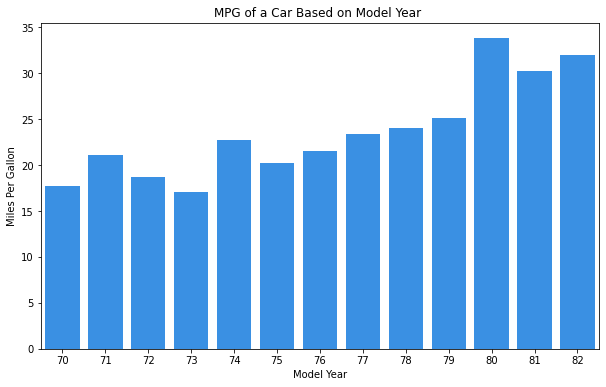

As the years progressed most cars had better gas Mileage


In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x=auto['model year'], y=auto['mpg'], ci=None, color='dodgerblue')
plt.xlabel('Model Year')
plt.ylabel('Miles Per Gallon')
plt.title('MPG of a Car Based on Model Year ')
plt.show()
print('As the years progressed most cars had better gas Mileage')

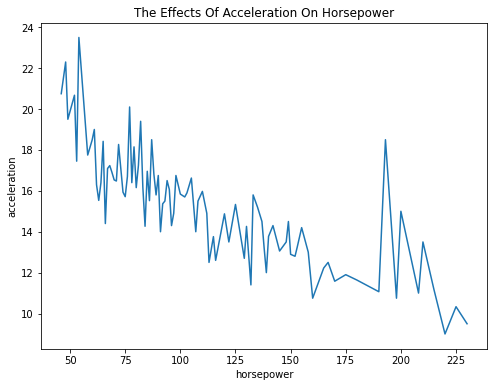

Mostly cars with higher horsepower have a faster acceleration time. This is do to the car having more power allowing
wheel speed to increase faster.


In [9]:
plt.figure(figsize=(8,6))
sns.lineplot(x=auto['horsepower'], y=auto['acceleration'], ci=None)
plt.title('The Effects Of Acceleration On Horsepower')
plt.show()
print('''Mostly cars with higher horsepower have a faster acceleration time. This is do to the car having more power allowing
wheel speed to increase faster.''')

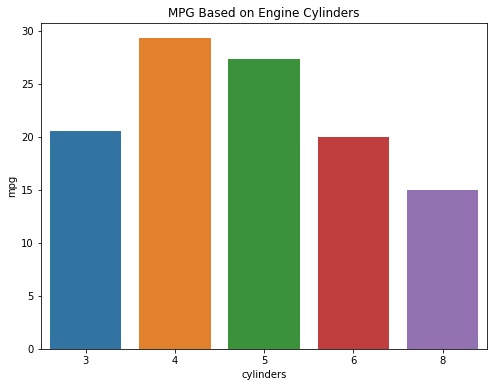

Mpg based on the cylinders of an engine. The most effecient is a 4 cylinder engine. the higher the number the worse the car is
for mpg this is becuase the cars that focus primaraly on performance have more pistons in the engine to push more power. However this eats up more gas
in which


In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x=auto['cylinders'], y=auto['mpg'], ci=None)
plt.title('MPG Based on Engine Cylinders')
plt.show()
print('''Mpg based on the cylinders of an engine. The most effecient is a 4 cylinder engine. the higher the number the worse the car is
for mpg this is becuase the cars that focus primaraly on performance have more pistons in the engine to push more power. However this eats up more gas
in which''')

301 different cars

In [235]:
len(auto['car name'].unique())

301

Catagorizing the years so there will be less encoding later on

In [236]:
auto['model year'].unique()

car_years = {
    70 : '70s',
    71 : '70s',
    72 : '70s', 
    73 : '70s', 
    74 : '70s',
    75 : '70s',
    76 : '70s', 
    77 : '70s', 
    78 : '70s',
    79 : '70s',
    80 : '80s',
    81 : '80s',
    82 : '80s'
}

auto['model year'].replace(car_years, inplace=True)

In [237]:
auto['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [238]:
X = auto.drop(columns=['car name', 'mpg'])
y = auto['mpg']

In [239]:
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=42)

In [240]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
265,4,134.0,95,2560,14.2,70s,3
16,6,199.0,97,2774,15.5,70s,1
66,8,429.0,208,4633,11.0,70s,1
158,6,231.0,110,3907,21.0,70s,1
7,8,440.0,215,4312,8.5,70s,1
...,...,...,...,...,...,...,...
71,8,304.0,150,3892,12.5,70s,1
106,6,232.0,100,2789,15.0,70s,1
270,4,151.0,85,2855,17.6,70s,1
348,4,98.0,65,2380,20.7,80s,1


In [241]:
scaler = StandardScaler()

scaled_train = X_train[['displacement','horsepower','weight','acceleration']]
scaled_test = X_test[['displacement','horsepower','weight','acceleration']]

scaled_train = scaler.fit_transform(scaled_train)
scaled_test = scaler.transform(scaled_test)

In [242]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ohe_train = X_train[['model year','origin', 'cylinders']]
ohe_test = X_test[['model year','origin', 'cylinders']]

ohe_train = ohe.fit_transform(ohe_train)
ohe_test = ohe.transform(ohe_test)

In [243]:
X_train = np.concatenate((ohe_train, scaled_train), axis=1)
X_test = np.concatenate((ohe_test, scaled_test), axis=1)

In [244]:
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

print(f'Train: {knn.score(X_train, y_train)}')
print(f'Test: {knn.score(X_test, y_test)}')

Train: 0.8695972908436914
Test: 0.8500254024071082


In [245]:
knn_params = {
    'n_neighbors' : [5,50,100],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
    'p' : [1,2],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
}

In [ ]:
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid=knn_params)

grid_knn.fit(X_train, y_train)

grid_knn.best_params_

{'algorithm': 'auto',
 'metric': 'manhattan',
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [246]:
knn = KNeighborsRegressor(algorithm= 'auto', metric='manhattan',n_neighbors= 5,p= 1,weights= 'distance')

knn.fit(X_train, y_train)

print(f'Train: {knn.score(X_train, y_train)}')
print(f'Test: {knn.score(X_test, y_test)}')

Train: 0.999760704893278
Test: 0.8755023575121575


Random Forest Model

In [247]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

print(f'Train: {rf.score(X_train, y_train)}')
print(f'Test: {rf.score(X_test, y_test)}')

Train: 0.9775437880081864
Test: 0.8473800394339241


In [248]:
rf_params = {
    'n_estimators' : [100, 150, 300], 
    'max_depth' : [5,10,100], 
    'max_features' : ['auto','sqrt', 'log2'],
    'bootstrap' : [True, False]
}

In [249]:
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid=rf_params)

grid_rf.fit(X_train, y_train)

grid_rf.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'sqrt',
 'n_estimators': 300}

In [250]:
rf = RandomForestRegressor(bootstrap= True, max_depth= 100,max_features= 'log2', n_estimators= 150)

rf.fit(X_train, y_train)

print(f'Train: {rf.score(X_train, y_train)}')
print(f'Test: {rf.score(X_test, y_test)}')

Train: 0.978913295948649
Test: 0.8556757813805829


In [251]:
test_scores=[knn.score(X_test, y_test), rf.score(X_test, y_test)]
train_scores=[rf.score(X_train, y_train),rf.score(X_train, y_train)]

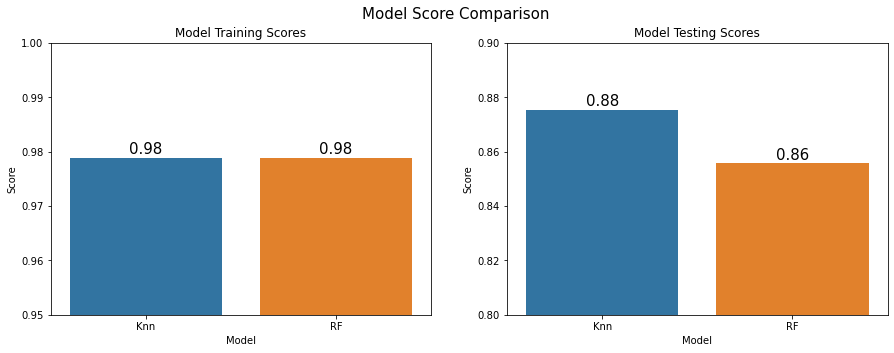

In [252]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
fig.suptitle('Model Score Comparison', fontsize=15)
plot1 = sns.barplot(ax=axes[0], x=['Knn', 'RF'], y=train_scores)
plt.ylim(.96, 1)
for bar in plot1 .patches:
    plot1.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')
axes[0].set_title('Model Training Scores')
axes[0].set_ylim(.95,1)
axes[0].set_ylabel('Score')
axes[0].set_xlabel('Model')

plot2 = sns.barplot(ax= axes[1], x=['Knn', 'RF'], y=test_scores)
axes[1].set_ylim(.8, .9)
axes[1].set_title('Model Testing Scores')
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Model')
for bar in plot2 .patches:
    plot2.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                    size=15, xytext=(0, 8),
                    textcoords='offset points')